In [1]:
import pandas as pd
teams = pd.read_csv("teams5sb.csv", index_col=[0,1])

teams.columns=[x.lower() for x in teams.columns]

In [2]:

# bramkarz-obrona-pomoc-atak-trener
# (PSxG-GA)/SoT; opp_xG; xG; Gls/xG
# ; SoTA; SCA; ;
bramkarz=['psxg','ga','sot']
obrona=['opp_xg','sota']
pomoc=['xg','sca']
atak=['gls','xg']
trener=['opp_xg'] #'opp_xg' vs AVGopp_xg

taktyka =['dist','cpa','1/3']# Dist(shot) C1/3 CPA
offence=['def pen','def 3rd','mid 3rd','att 3rd','att pen','touches'] #Touches[Def3rd Mid3rd Att3rd]/Touches
intensity=['touches']
wide=['sw','crs','att','opp_ti'] #/Poss Sw Crs Take-Ons[Att]'opp_ti'
speed=['poss','prgdist'] #PrgP/Poss poss/prgdist
stalefragmenty =['dead','fk','ti','ck', 'gca passdead'] #/Poss Dead,FK,TI,CK GCA pass dead
press=['sca def','tackles def 3rd', 'tackles mid 3rd', 'tackles att 3rd','tackles tkl','fls','won','opp_rec','opp_total cmp','opp_total att']
# SCA_Def,Tackles[Def3rd Mid3rd Att3rd], *oppRec, Fls AWon 
where=['tackles def 3rd','tackles mid 3rd','tackles att 3rd','def 3rd','mid 3rd','att 3rd','att pen','def pen']
error=['challenges lost','tackles tklw','tackles tkl','err','mis','dis','crdy','og','lost']
# ChallengesLost TklW/TklAtt Err Mis Dis CrdY OG Alost
succ=['int','tackles tklw','succ','challenges tkl','blocks','opp_total att','recov'] #Int TklW ChaTkl Take-Ons[Att] blocks 'opp_total att'



In [4]:
subset=bramkarz+obrona+pomoc+atak+trener+taktyka+offence+intensity+wide+speed+stalefragmenty+press+error+where
subset=list(set(subset))
len(subset)
df=teams[subset]
df

tackles att 3rd  poss   ti  opp_rec  dist   ck  og  \
1819 Arsenal                       79  58.1  823    12212  16.7  209   1   
     Bournemouth                   55  46.9  832    15971  17.4  191   3   
     Brighton                      78  42.4  880    17547  17.9  156   0   
     Burnley                       58  41.2  891    16502  15.8  139   4   
     Cardiff City                  64  35.4  799    17425  17.7  168   0   
...                               ...   ...  ...      ...   ...  ...  ..   
2223 Nott'ham Forest               78  37.6  720    18267  17.2  128   0   
     Southampton                   57  44.5  752    16240  18.1  157   5   
     Tottenham                     79  50.0  664    15945  16.7  203   1   
     West Ham                      92  42.1  722    18736  17.3  206   1   
     Wolves                        75  49.9  663    14439  18.0  185   1   

                      touches  gls  def pen  ...  lost  psxg   sw  att  \
1819 Arsenal            26670   69     2457  ...   637  53.5  152  536   
     Bournemouth        22079   55     2437  ...   736  55.2   84  578   
     Brighton           20254   35     2464  ...   780  55.9  188  516   
     Burnley            19189   43     2542  ...  1025  58.0  108  370   
     Cardiff City       16261   33     2228  ...   966  68.2   60  475   
...                       ...  ...      ...  ...   ...   ...  ...  ...   
2223 Nott'ham Forest    17912   36     2715  ...   600  60.1   66  569   
     Southampton        21095   36     2639  ...   611  46.3   87  756   
     Tottenham          23836   68     2734  ...   474  55.1  165  663   
     West Ham           20411   41     2362  ...   587  53.2  162  607   
     Wolves             22539   28     2921  ...   542  52.2  149  772   

                      opp_total att  att 3rd  tackles tkl  dis  prgdist  \
1819 Arsenal                  16319     6492          609  409    44451   
     Bournemouth              20430     5257          525  356    36536   
     Brighton                 21902     4366          679  336    26537   
     Burnley                  21331     4395          584  314    21370   
     Cardiff City             22088     4470          655  332    19337   
...                             ...      ...          ...  ...      ...   
2223 Nott'ham Forest          22551     3755          659  275    24008   
     Southampton              20617     4880          713  400    29819   
     Tottenham                19765     5135          619  356    36837   
     West Ham                 22778     4994          607  355    28201   
     Wolves                   18284     4960          661  327    35065   

                      def 3rd  
1819 Arsenal             7996  
     Bournemouth         7561  
     Brighton            7030  
     Burnley             6104  
     Cardiff City        5452  
...                       ...  
2223 Nott'ham Forest     7420  
     Southampton         7452  
     Tottenham           8571  
     West Ham            6898  
     Wolves              8544  

[100 rows x 46 columns]

In [38]:
def norm(df):
    return (df-df.min())/(df.max()-df.min())
# norm(sel['xG']).sort_values()
# sel.rank(pct = True)
dfn=norm(df)
dfnr=dfn.reset_index(drop=True)

In [ ]:
corr=df.corr()

In [12]:
corr=corr.sort_values('opp_rec')
corr

tackles att 3rd      poss        ti   opp_rec      dist  \
poss                    0.544790  1.000000 -0.112454 -0.936275 -0.189629   
touches                 0.485809  0.977544 -0.114363 -0.856135 -0.156654   
att pen                 0.601132  0.854424 -0.191547 -0.831119 -0.425466   
att 3rd                 0.565479  0.903593 -0.138567 -0.829518 -0.285127   
sot                     0.461699  0.860314 -0.148910 -0.824426 -0.214101   
sca                     0.511955  0.870561 -0.165951 -0.823197 -0.179892   
mid 3rd                 0.413025  0.933499 -0.028384 -0.812383 -0.106577   
prgdist                 0.392373  0.935094 -0.223891 -0.807437 -0.135854   
ck                      0.507711  0.807607 -0.062120 -0.786750 -0.328960   
xg                      0.510905  0.818240 -0.165996 -0.784954 -0.411982   
1/3                     0.340566  0.886959 -0.083391 -0.773450 -0.090430   
gls                     0.447521  0.799231 -0.178529 -0.749988 -0.356125   
cpa                     0.396105  0.814158 -0.243671 -0.738560 -0.181005   
tackles att 3rd         1.000000  0.544790 -0.063434 -0.603763 -0.359278   
sw                      0.174128  0.534941  0.173958 -0.437145 -0.057957   
crs                     0.355839  0.416881  0.180562 -0.418170 -0.399236   
att                     0.235169  0.453195 -0.275022 -0.382969 -0.025676   
fk                      0.005502  0.292443  0.010103 -0.292158  0.269969   
sca def                 0.327591  0.244438  0.114975 -0.268396  0.094147   
def 3rd                 0.095913  0.316329 -0.199690 -0.226211  0.075173   
dis                     0.073960  0.163415  0.355856 -0.178429  0.130060   
tackles mid 3rd         0.154712  0.055091  0.456801 -0.148754  0.149705   
err                    -0.080082  0.119889  0.248929 -0.143273  0.162942   
gca passdead            0.129017  0.089998  0.096438 -0.112264 -0.390787   
mis                     0.056539 -0.077344  0.405062 -0.041805  0.209433   
ti                     -0.063434 -0.112454  1.000000 -0.016445  0.045584   
dead                   -0.176947 -0.218282  0.810852  0.050301  0.116721   
tackles tklw            0.106974 -0.183412  0.392333  0.083998  0.205752   
tackles tkl             0.087307 -0.236316  0.360886  0.133721  0.231893   
challenges lost        -0.150843 -0.178665  0.303587  0.147619  0.140818   
fls                     0.008512 -0.245466  0.176732  0.163861  0.211197   
og                     -0.239874 -0.202175 -0.055160  0.205987  0.041880   
dist                   -0.359278 -0.189629  0.045584  0.224685  1.000000   
crdy                   -0.103209 -0.368592 -0.043012  0.261675  0.111487   
def pen                -0.244125 -0.326128 -0.178602  0.316680  0.087076   
opp_ti                 -0.246117 -0.553706  0.643109  0.393014  0.267586   
won                    -0.375218 -0.547787  0.597151  0.446674 -0.034126   
tackles def 3rd        -0.307880 -0.540416  0.235069  0.476769  0.345913   
lost                   -0.409904 -0.635463  0.580610  0.509807  0.096825   
psxg                   -0.354121 -0.674539  0.145461  0.604804  0.271695   
ga                     -0.375078 -0.680687  0.125964  0.610034  0.328420   
sota                   -0.386446 -0.699370  0.103299  0.615385  0.254726   
opp_xg                 -0.376861 -0.729297  0.110209  0.651506  0.278094   
opp_total att          -0.599555 -0.956347  0.077871  0.992254  0.228374   
opp_total cmp          -0.602114 -0.937021 -0.017373  0.999973  0.223903   
opp_rec                -0.603763 -0.936275 -0.016445  1.000000  0.224685   

                       ck        og   touches       gls   def pen  ...  \
poss             0.807607 -0.202175  0.977544  0.799231 -0.326128  ...   
touches          0.778486 -0.208510  1.000000  0.782789 -0.340010  ...   
att pen          0.882467 -0.224188  0.822890  0.853231 -0.497955  ...   
att 3rd          0.872214 -0.267049  0.905783  0.799259 -0.556943  ...   
sot              0.813476 -0.147474  0.839095  0.904764 -0.438343  ...   


<Axes: >

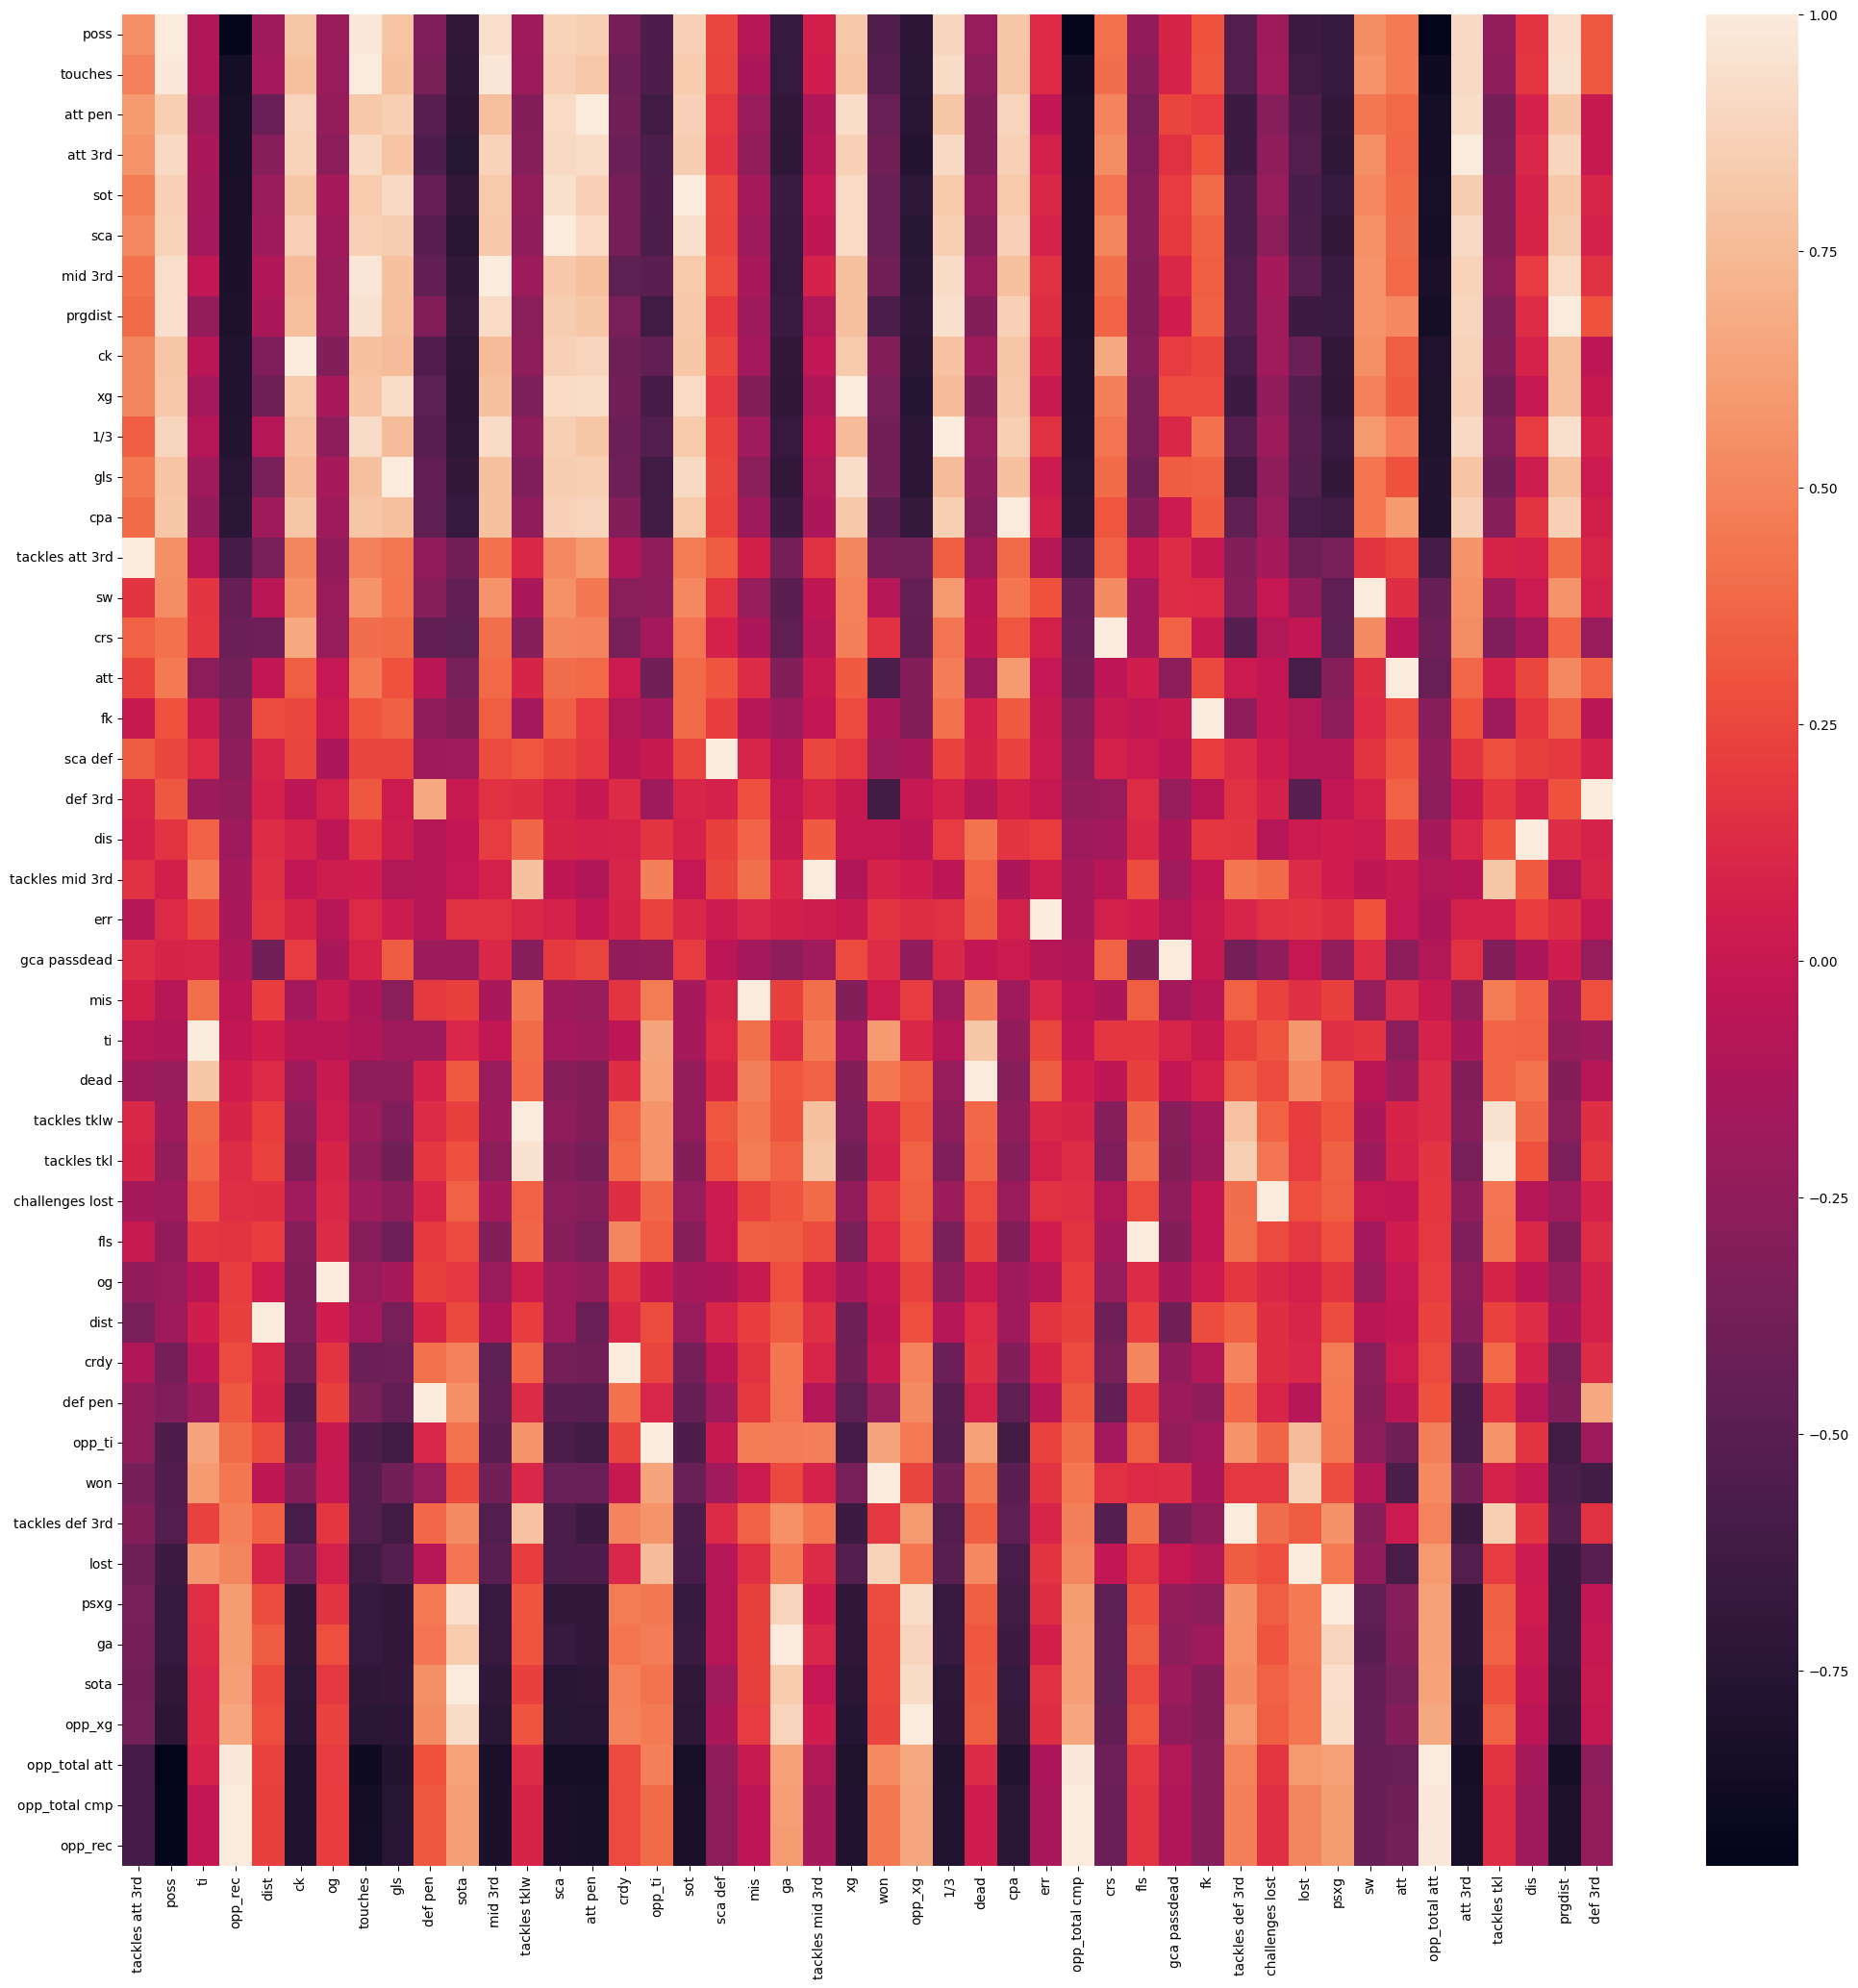

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,25))
# sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)
sns.heatmap(corr, ax=ax,square=True, cmap='RdYlGn')

In [21]:
corr.index

Index(['lost', 'won', 'opp_ti', 'gca passdead', 'ti', 'dead', 'def pen', 'crs',
       'dist', 'challenges lost', 'og', 'err', 'tackles mid 3rd', 'crdy',
       'tackles def 3rd', 'fls', 'tackles tkl', 'tackles tklw', 'mis', 'sw',
       'tackles att 3rd', 'dis', 'fk', 'sca def', 'def 3rd', 'att'],
      dtype='object')

In [58]:
crg1a=['poss', 'touches']
crg1b=['att pen','att 3rd','mid 3rd','1/3']
crg1c=['sot','gls', 'cpa','sca','xg', 'prgdist', 'ck']
crg1d=['prgdist', 'ck']
crg2=['opp_total att', 'opp_total cmp', 'opp_rec']
crg3=[ 'sota','ga','psxg','opp_xg']
crg4=['lost', 'won','def 3rd', 'att']
crg5=['opp_ti','ti', 'dead']
crg6=['crs','gca passdead']
crg7=['fls','crdy']
crg8=['sw','tackles att 3rd']
crg9=['fk', 'sca def']
crg0=[ 'tackles tkl', 'tackles tklw', 'mis']
rest=[ 'def pen', 'challenges lost', 'og', 'err','dis', 'tackles mid 3rd','tackles def 3rd','dist' ]

<Axes: >

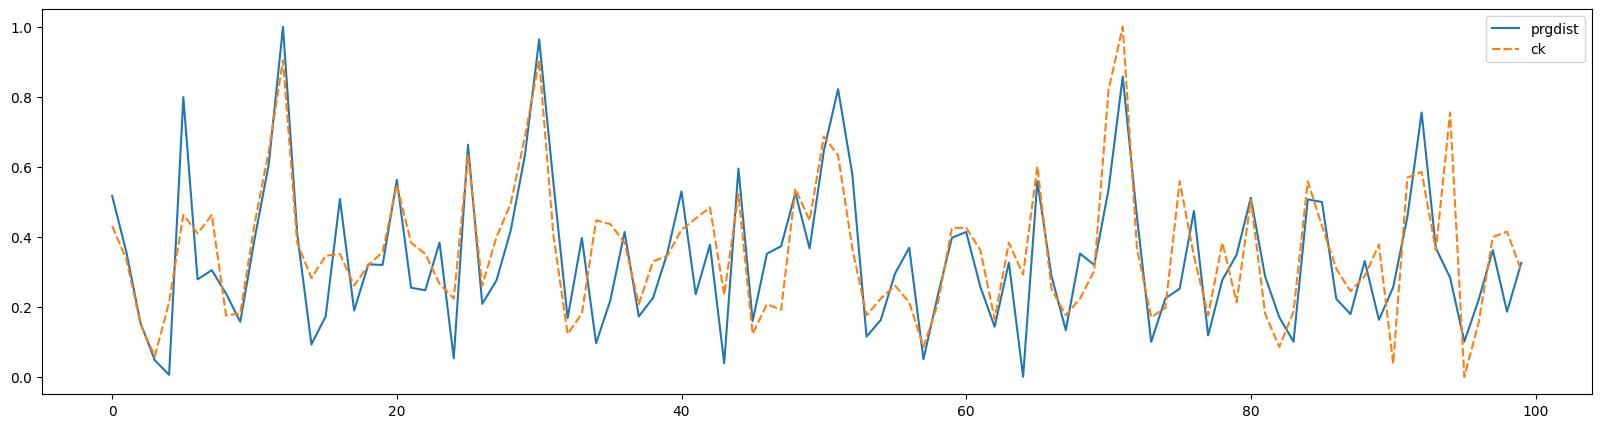

In [60]:

fig = plt.subplots(figsize=(20, 5))
sns.lineplot(data=dfnr[crg1d],estimator=None)

<Axes: >

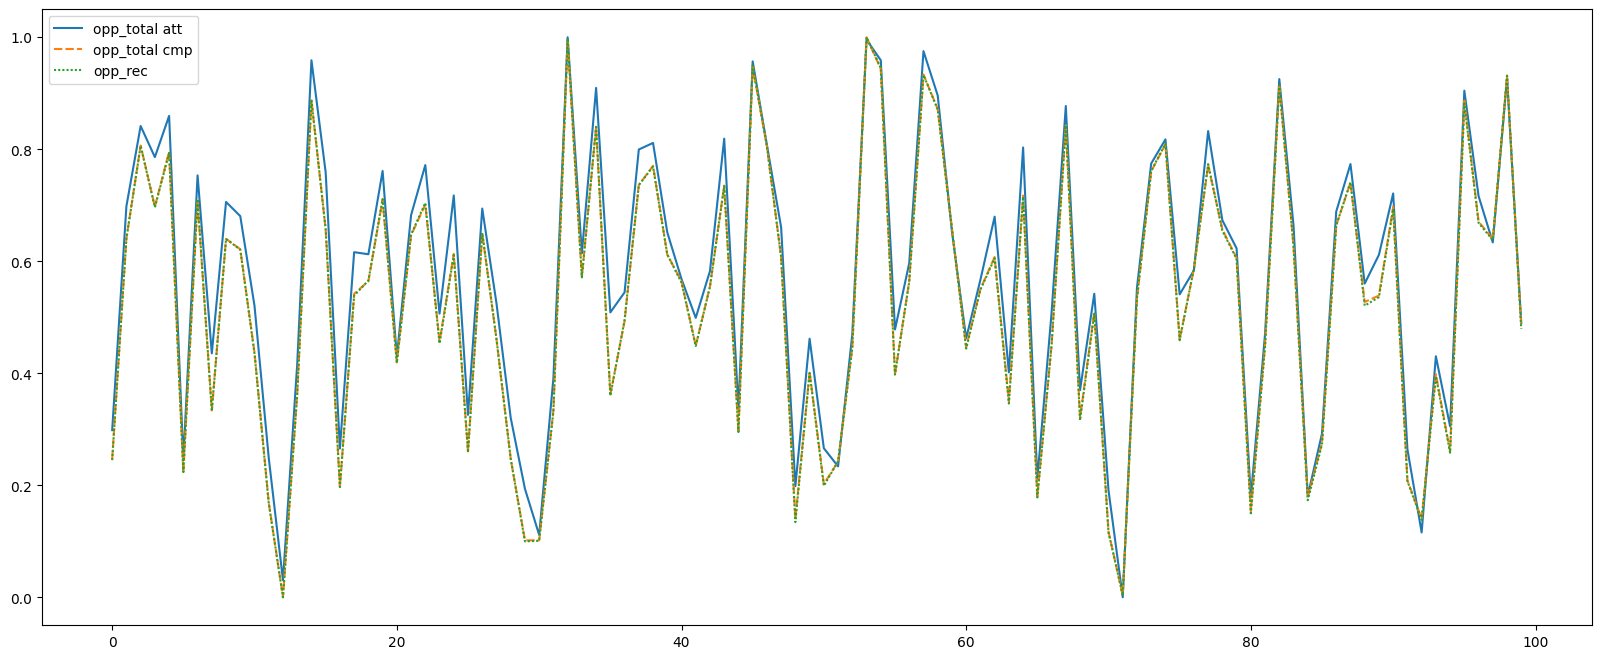

In [41]:
fig = plt.subplots(figsize=(20, 8))
sns.lineplot(data=dfnr[crg2],estimator=None)


<Axes: >

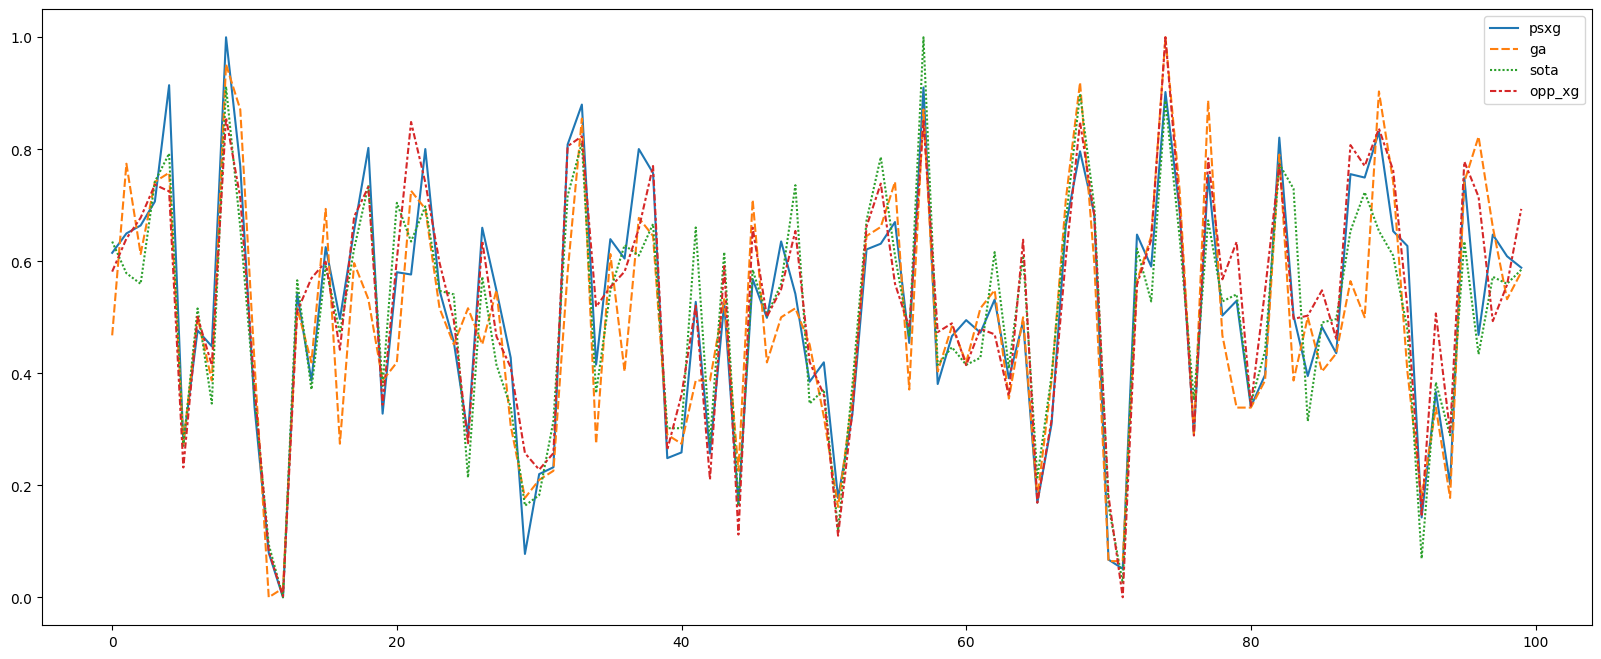

In [42]:
fig = plt.subplots(figsize=(20, 8))
sns.lineplot(data=dfnr[crg3],estimator=None)

<Axes: >

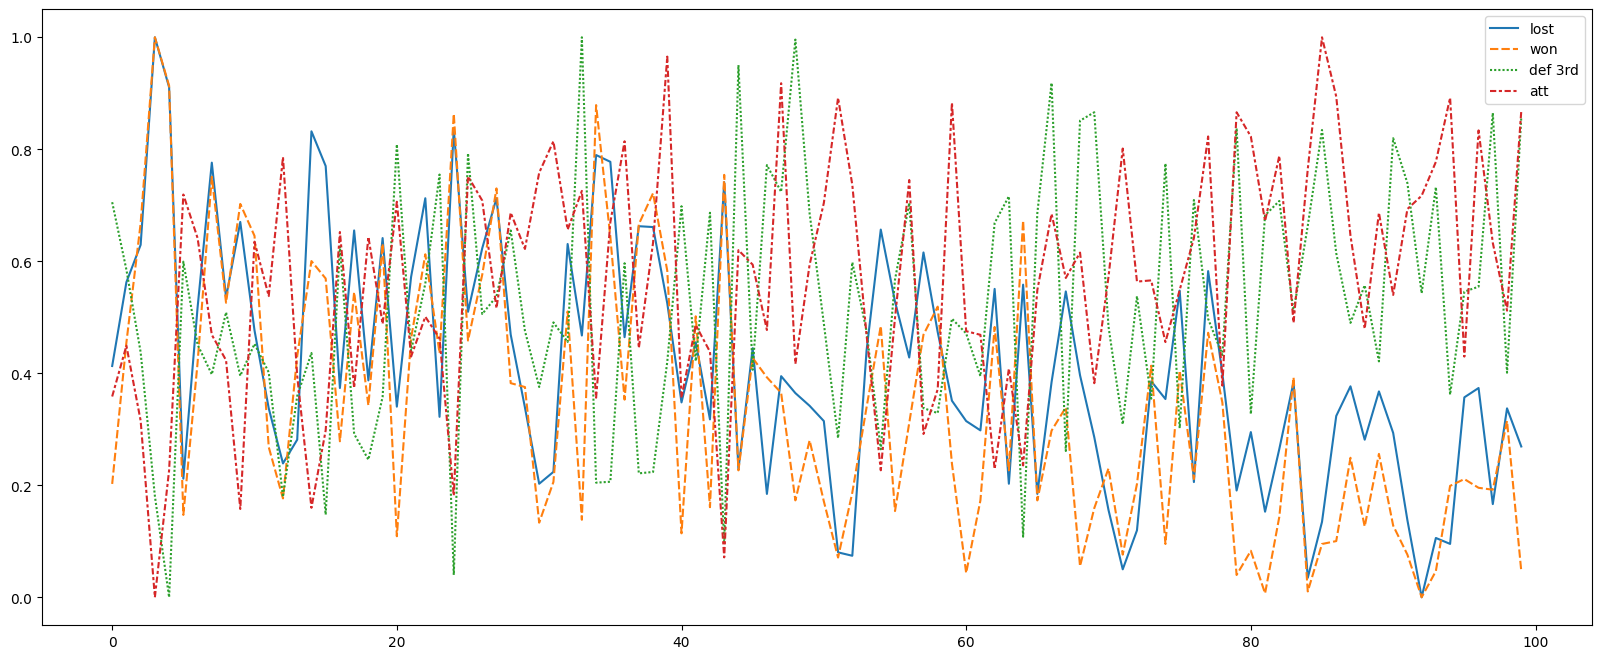

In [43]:
fig = plt.subplots(figsize=(20, 8))
sns.lineplot(data=dfnr[crg4],estimator=None)

<Axes: >

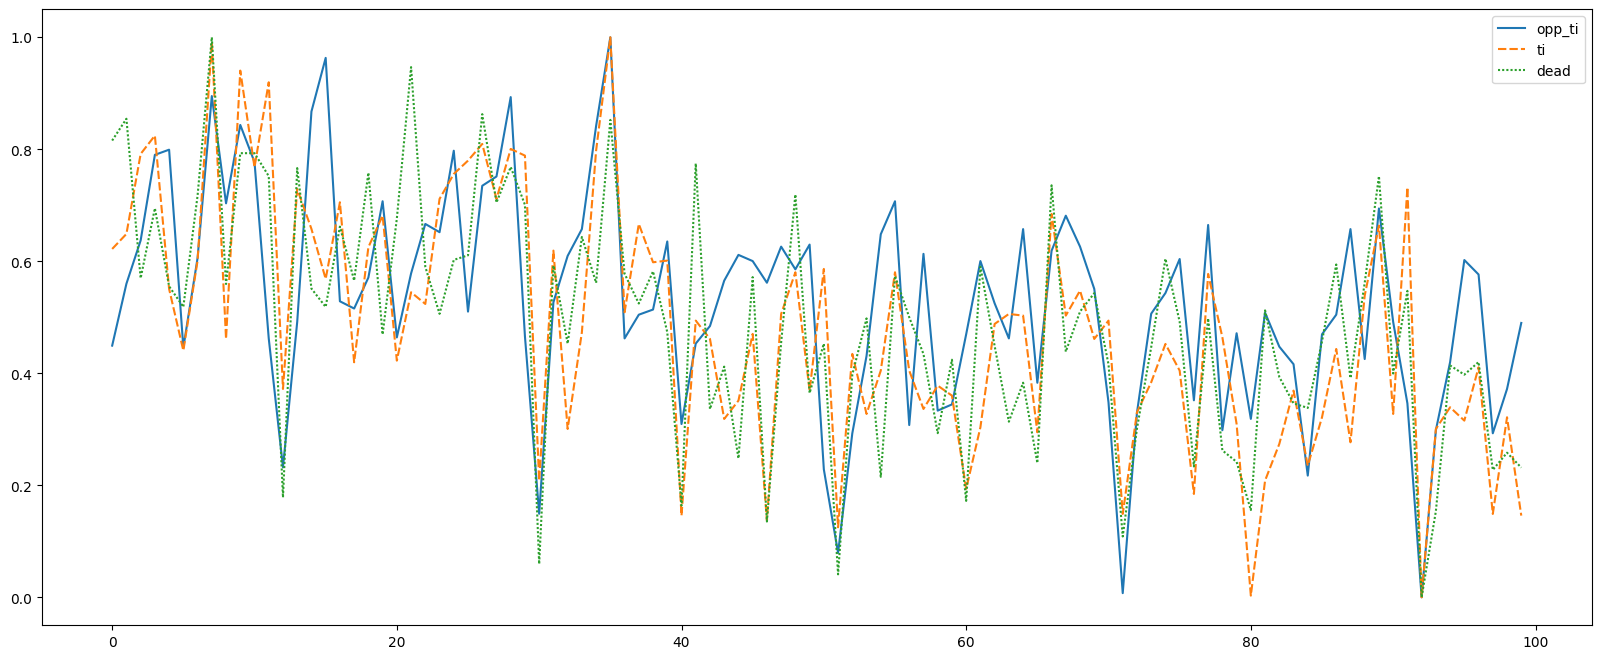

In [44]:
fig = plt.subplots(figsize=(20, 8))
sns.lineplot(data=dfnr[crg5],estimator=None)

<Axes: >

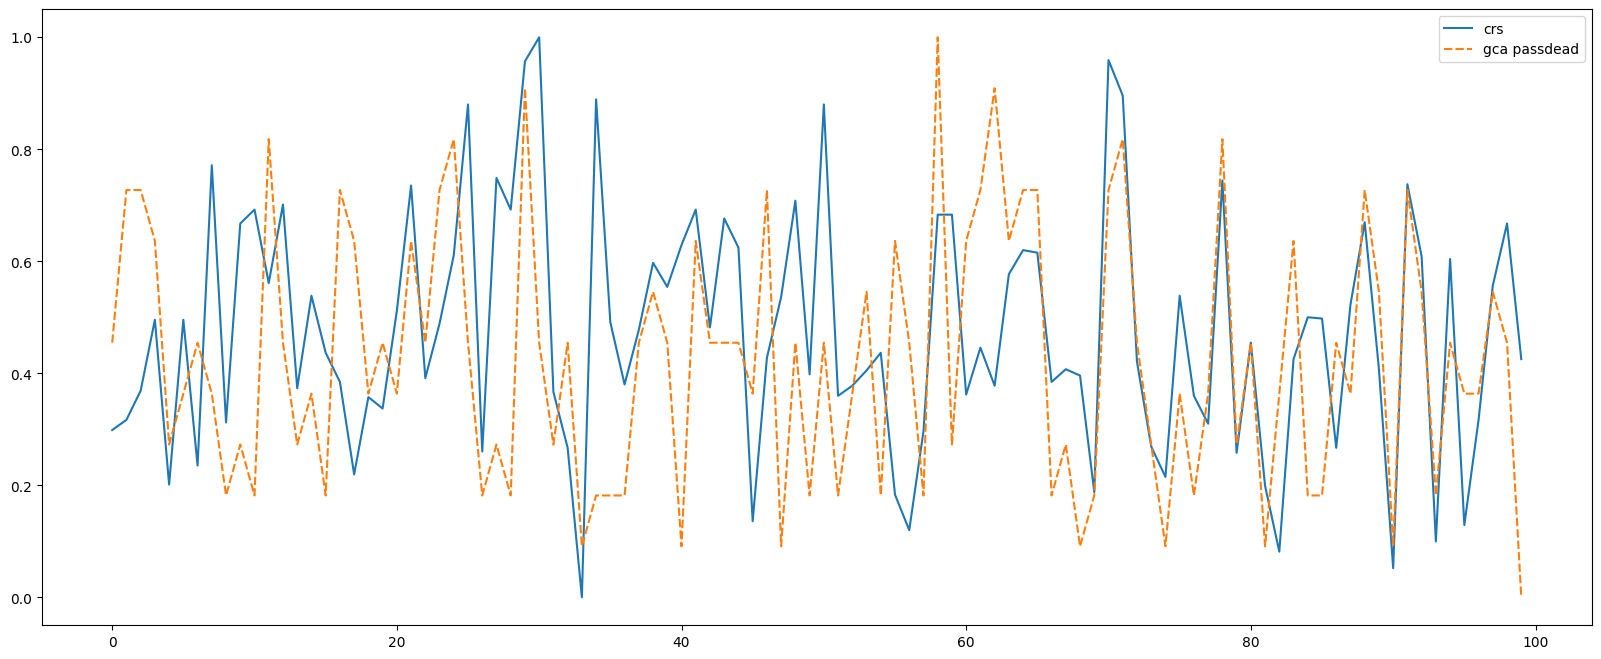

In [45]:
fig = plt.subplots(figsize=(20, 8))
sns.lineplot(data=dfnr[crg6],estimator=None)

<Axes: >

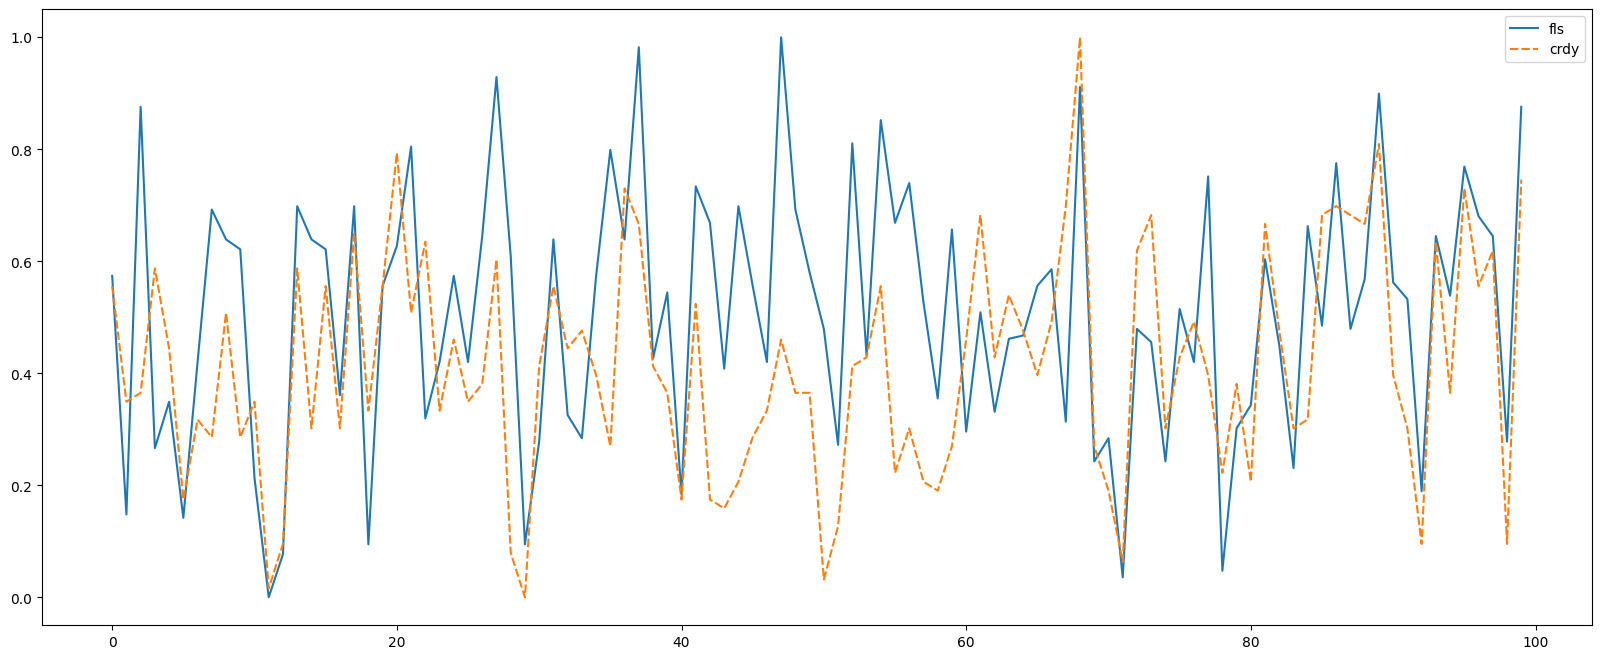

In [47]:
fig = plt.subplots(figsize=(20, 8))
sns.lineplot(data=dfnr[crg7],estimator=None)

<Axes: >

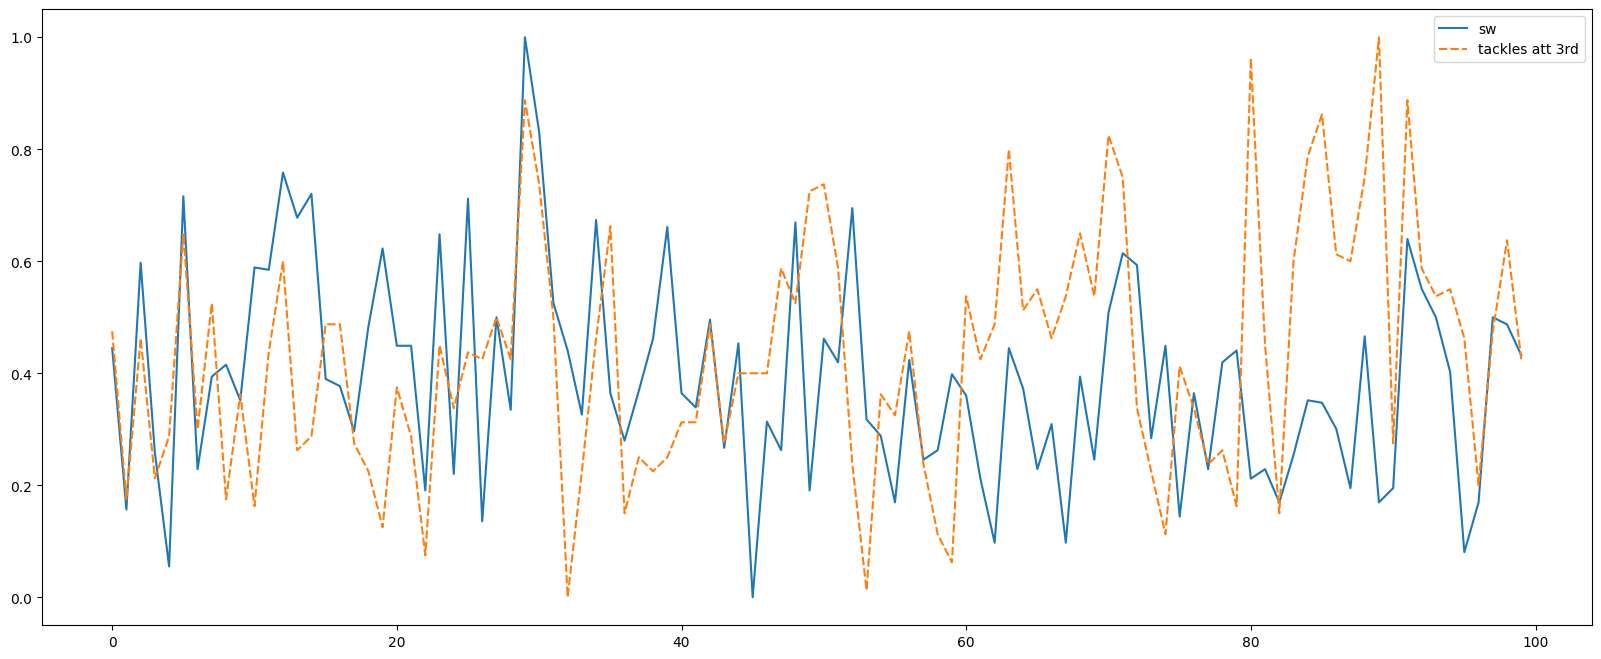

In [48]:
fig = plt.subplots(figsize=(20, 8))
sns.lineplot(data=dfnr[crg8],estimator=None)

<Axes: >

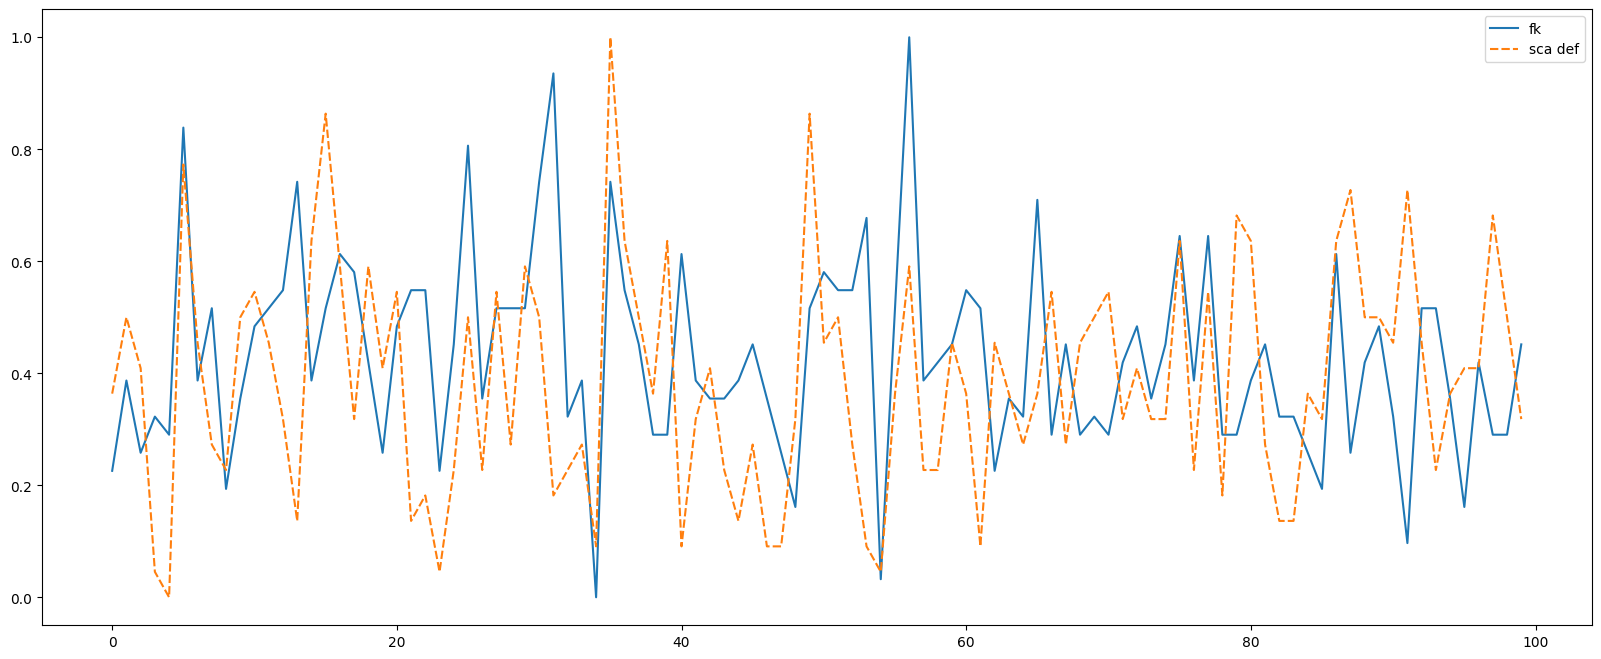

In [49]:
fig = plt.subplots(figsize=(20, 8))
sns.lineplot(data=dfnr[crg9],estimator=None)

<Axes: >

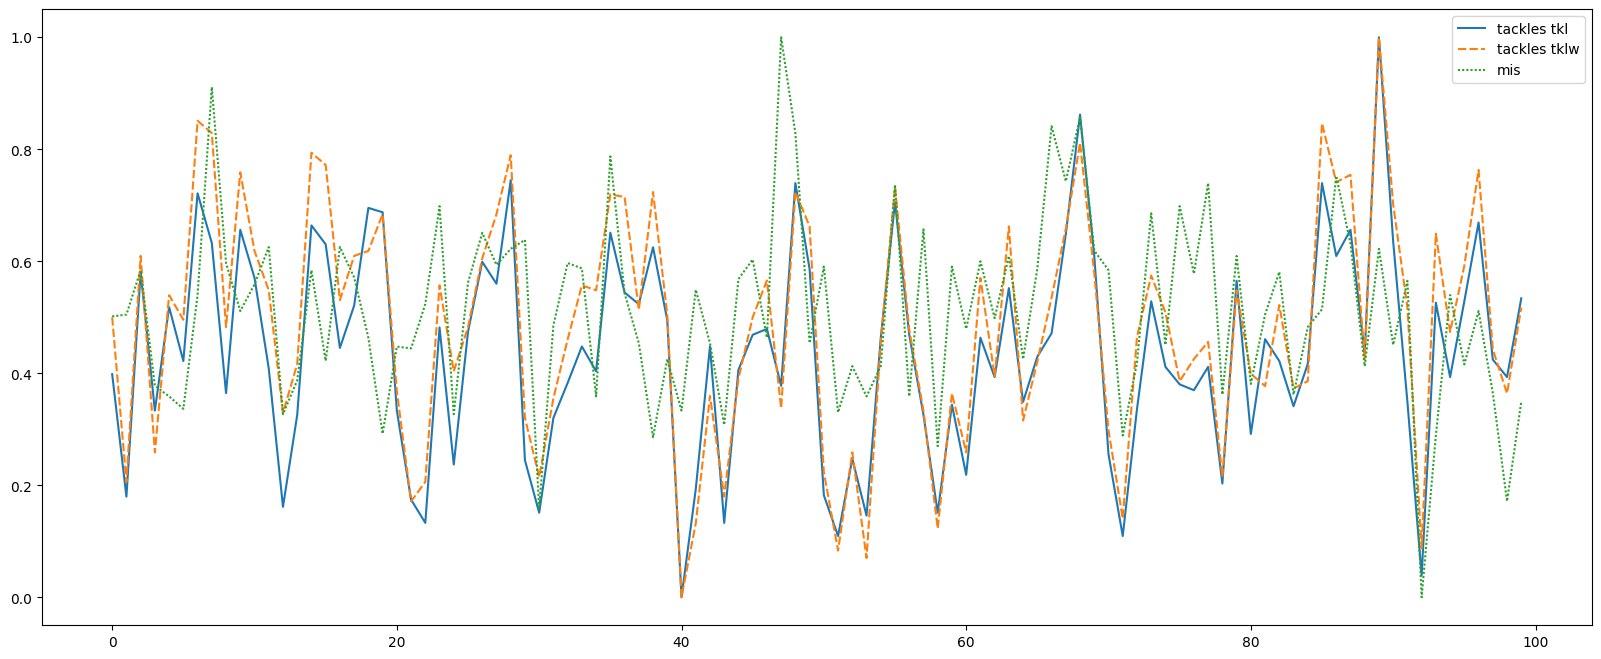

In [50]:
fig = plt.subplots(figsize=(20, 8))
sns.lineplot(data=dfnr[crg0],estimator=None)

<Axes: >

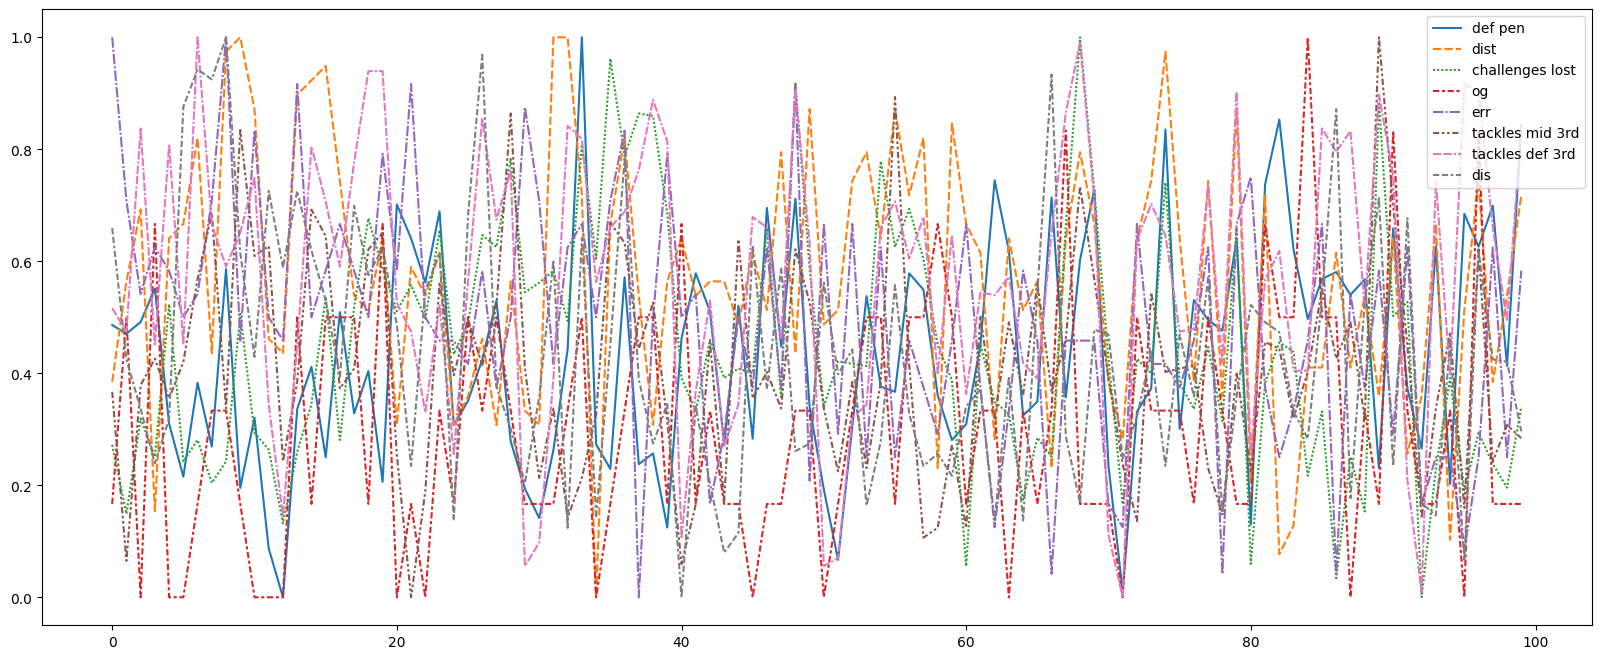

In [51]:
fig = plt.subplots(figsize=(20, 8))
sns.lineplot(data=dfnr[rest],estimator=None)